<a href="https://colab.research.google.com/github/Chandrashekar0123/Deep_Learning/blob/Transfer_Learning/Tranfer_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Cats vs Dogs dataset is a popular dataset used for binary classification tasks in machine learning, particularly for image classification. It consists of a collection of images, each labeled as either a "cat" or a "dog." The dataset was created by Microsoft Research for a competition and has since become widely used in machine learning and computer vision.

Key Features of the Cats vs Dogs Dataset:
Images: The dataset contains around 25,000 images of cats and dogs.
Size of Images: The original images are of varying sizes, and for model training, these images are often resized (e.g., to 224x224 pixels) to standardize the input size.
Labels: The images are labeled as 0 for "cat" and 1 for "dog", making it a binary classification problem.

##Importing the necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

library that consists of datasets

In [ ]:
 import tensorflow_datasets

##Loading the dataset

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the Cats vs Dogs dataset
dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

# Unpack the dataset (Only the 'train' split is available)
train_ds = dataset['train']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.M1M2D1_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


#Image Preprocessing

In [ ]:
# Normalize the pixel values to [0, 1] by dividing by 255.0
# Also, resize the images to the required size for AlexNet (224x224)
def preprocess(image, label):
    image = tf.cast(image, tf.float32)  # Convert the image to float32
    image = tf.image.resize(image, (224, 224))  # Resize image to (224, 224)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

train_ds = train_ds.map(preprocess)

##Splitting the data

In [ ]:
# Optionally, split the dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * info.splits['train'].num_examples)
val_size = info.splits['train'].num_examples - train_size

train_ds = train_ds.take(train_size)
val_ds = train_ds.skip(train_size)

# Batch and Prefetch the data for better performance during training
train_ds = train_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Check the number of classes (should be 2: cat, dog)
print(f"Classes: {info.features['label'].names}")


Classes: ['cat', 'dog']


#Identifying the classes

In [ ]:
# Check the number of classes (should be 2: cat, dog)
print(f"Classes: {info.features['label'].names}")

Classes: ['cat', 'dog']


##Transfer Learning of AlexNet

In [ ]:
# Build the AlexNet model
def build_alexnet(input_shape):
    input_layer = Input(shape=input_shape)
    # Convolutional layers (feature extraction)
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Feature extractor
    feature_extractor = Model(inputs=input_layer, outputs=x)
    return feature_extractor

# Define input shape
input_shape = (224, 224, 3)

# Load the feature extractor (AlexNet convolutional layers)
feature_extractor = build_alexnet(input_shape)

# Freeze the feature extractor's layers
feature_extractor.trainable = False

# Add fully connected layers for classification
x = Flatten()(feature_extractor.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 54,538,241 (208.05 MB)

 Non-trainable params: 3,747,200 (14.29 MB)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.5277 - loss: 0.7133 - val_accuracy: 0.6536 - val_loss: 0.6534
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step - accuracy: 0.5593 - loss: 0.6770 - val_accuracy: 0.6342 - val_loss: 0.6485
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 70s 120ms/step - accuracy: 0.5713 - loss: 0.6738 - val_accuracy: 0.6785 - val_loss: 0.6454
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 89s 132ms/step - accuracy: 0.5850 - loss: 0.6660 - val_accuracy: 0.6944 - val_loss: 0.6416
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 132ms/step - accuracy: 0.5949 - loss: 0.6606 - val_accuracy: 0.7032 - val_loss: 0.6205
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 69s 119ms/step - accuracy: 0.5994 - loss: 0.6571 - val_accuracy: 0.6746 - val_loss: 0.6488
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 78s 134ms/step - accuracy: 0.5997 - loss: 0.6560 - val_accuracy: 0.7073 - val_loss: 0.6086
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 65s 112ms/step - accuracy: 0.5912 - loss: 0

In [ ]:
# Build the complete model
alexnet_model = Model(inputs=feature_extractor.input, outputs=output)

In [ ]:
# Normalize and split the dataset
full_dataset = dataset['train'].map(preprocess)
train_ds = full_dataset.take(train_size)
val_ds = full_dataset.skip(train_size)

# Batch and Prefetch
train_ds = train_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Debug dataset sizes
print(f"Number of training batches: {len(train_ds)}")
print(f"Number of validation batches: {len(val_ds)}")

# Evaluate the model
loss, accuracy = alexnet_model.evaluate(val_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Number of training batches: 582
Number of validation batches: 146
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.6753 - loss: 0.6525
Test Loss: 0.6528335809707642
Test Accuracy: 0.6726843118667603


#Compiling the model

In [ ]:

# Compile the model
alexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##Training the Model

In [ ]:
# Train the model
history = alexnet_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

In [ ]:
# Summary of the model
alexnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,856,325 (667.02 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,570,884 (444.68 MB)

##Model Evaluation

In [ ]:
# Evaluate the model
loss, accuracy = alexnet_model.evaluate(val_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.6753 - loss: 0.6525
Test Loss: 0.6528335809707642
Test Accuracy: 0.6726843118667603


##Accuracy and Loss

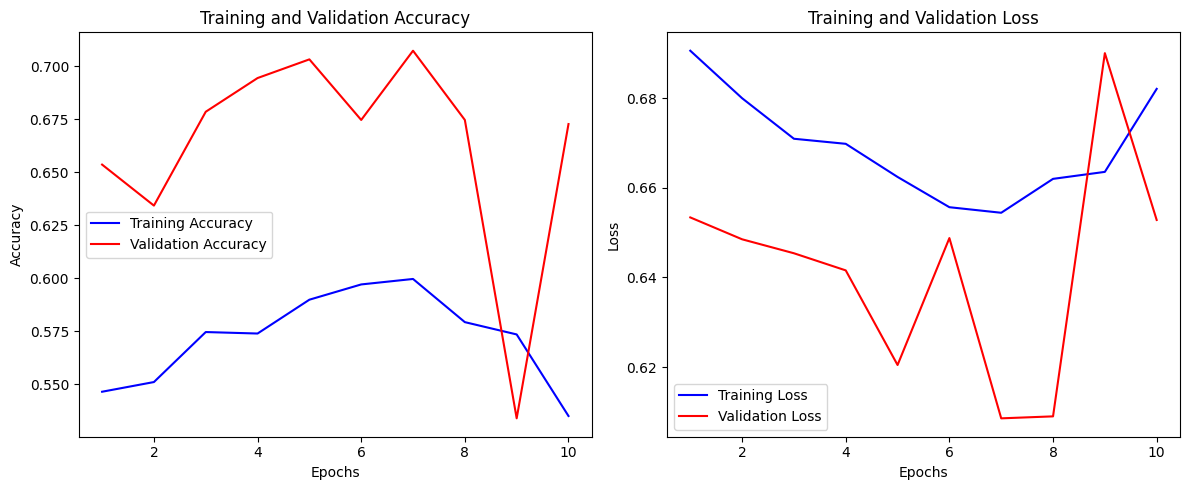

In [ ]:
# Plot accuracy and loss
def plot_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_history(history)

##Making Predictions

In [ ]:
# Make predictions
predictions = alexnet_model.predict(val_ds)
predicted_labels = (predictions > 0.5).astype(int)

146/146 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step


##Making 5 Predictions

In [ ]:

# Display the first 5 predictions
for i, label in enumerate(predicted_labels[:5]):
    print(f"Prediction {i + 1}: {'Dog' if label == 1 else 'Cat'}")


Prediction 1: Dog
Prediction 2: Cat
Prediction 3: Dog
Prediction 4: Dog
Prediction 5: Cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


<ipython-input-17-10f537235841>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(prediction[0] > 0.5)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


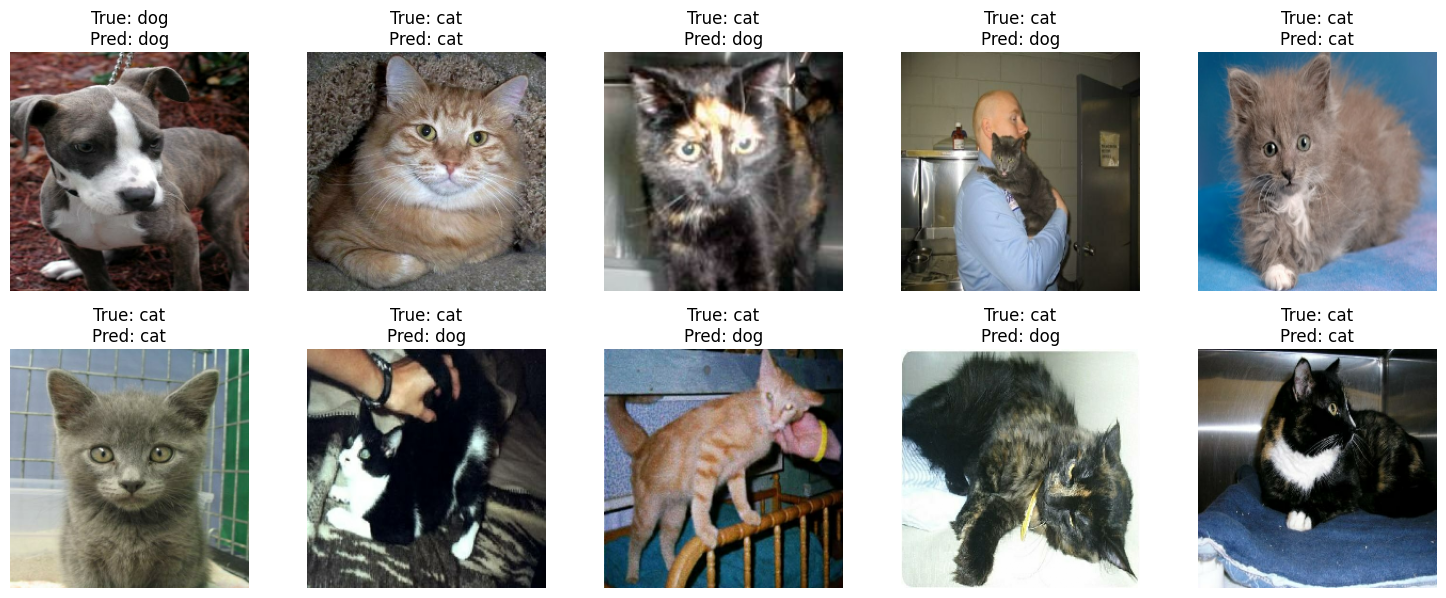

In [ ]:
import numpy as np

# Function to display images with predictions
def display_predictions(dataset, model, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.unbatch().take(num_images)):
        ax = plt.subplot(5, 5, i + 1)
        image = tf.expand_dims(image, 0)  # Expand dimensions to match input shape
        prediction = model.predict(image)
        predicted_label = class_names[int(prediction[0] > 0.5)]
        true_label = class_names[label.numpy()]

        plt.imshow(image[0])
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Class names
class_names = info.features['label'].names  # ['cat', 'dog']

# Call the function to display predictions
display_predictions(val_ds, alexnet_model, class_names, num_images=10)


In [ ]:
'''from google.colab import files
uploaded = files.upload()

# Assuming one image is uploaded
image_path = list(uploaded.keys())[0]
for image, label in val_ds.take(1):  # Take one example
    image_path = image.numpy()  # Convert to NumPy array if needed
    break
'''  # This will be the name of the uploaded file


'from google.colab import files\nuploaded = files.upload()\n\n# Assuming one image is uploaded\nimage_path = list(uploaded.keys())[0]'

In [ ]:
alexnet_model.save('my_transfer_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


<ipython-input-24-e5ce4771b769>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)  # Convert probability to class index


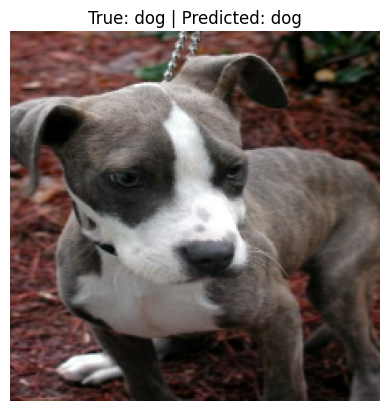

In [ ]:
# Define or load your model
# Assuming you have already trained and saved the model
transfer_model = tf.keras.models.load_model('/content/my_transfer_model.h5')  # Replace with actual path

# Function to visualize predictions
def visualize_prediction(image, label, model, class_labels):
    # Preprocess the image
    resized_image = tf.image.resize(image, (224, 224))  # Resize to match model input
    normalized_image = tf.expand_dims(resized_image / 255.0, axis=0)  # Normalize and expand dims

    # Predict the class
    prediction = model.predict(normalized_image)
    predicted_class = int(prediction[0] > 0.5)  # Convert probability to class index

    # Display the image
    plt.imshow(image.numpy())
    plt.title(f"True: {class_labels[label]} | Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

# Example usage
for image, label in val_ds.unbatch().take(1):  # Take one image from validation dataset
    visualize_prediction(image, label.numpy(), transfer_model, info.features['label'].names)
